In [7]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import pandas as pd

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [3]:
digits = load_digits()

In [4]:
data = digits.data

In [5]:
data.shape

(1797, 64)

In [9]:
pd.DataFrame(data).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,0.0,5.0,13.0,9.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,6.0,13.0,10.0,0.0,0.0,0.0
1,0.0,0.0,0.0,12.0,13.0,5.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,11.0,16.0,10.0,0.0,0.0
2,0.0,0.0,0.0,4.0,15.0,12.0,0.0,0.0,0.0,0.0,...,5.0,0.0,0.0,0.0,0.0,3.0,11.0,16.0,9.0,0.0
3,0.0,0.0,7.0,15.0,13.0,1.0,0.0,0.0,0.0,8.0,...,9.0,0.0,0.0,0.0,7.0,13.0,13.0,9.0,0.0,0.0
4,0.0,0.0,0.0,1.0,11.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,2.0,16.0,4.0,0.0,0.0


In [10]:
digits.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [11]:
digits.images[0].shape

(8, 8)

In [12]:
digits.target[0]

0

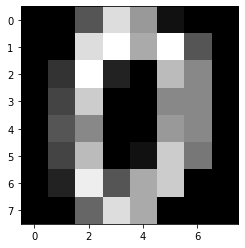

In [13]:
plt.gray()
plt.imshow(digits.images[0])
plt.show()

## LogisticRegression

In [14]:
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.5, random_state=33)

In [15]:
## 采用Z-Score规范化
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [17]:
pd.DataFrame(train_ss_x).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.305643,-1.070454,-1.053600,-1.426863,-1.033180,-0.421916,-0.139182,-0.055704,-0.608199,...,-0.739207,-0.195466,0.0,-0.276135,-1.061226,-1.760254,0.441269,-1.116286,-0.502491,-0.187129
1,0.0,1.944087,2.154556,0.989884,0.952567,1.246847,0.144846,-0.139182,-0.055704,-0.282715,...,-0.117276,-0.195466,0.0,1.861530,1.941235,0.904984,0.441269,-0.278698,-0.502491,-0.187129
2,0.0,-0.305643,0.649551,0.081669,0.952567,1.773007,2.128514,-0.139182,-0.055704,0.693738,...,-0.739207,-0.195466,0.0,-0.276135,0.740250,0.904984,-0.376604,-1.116286,-0.502491,-0.187129
3,0.0,0.819222,0.864552,0.762830,0.238738,-0.331633,-0.421916,-0.139182,-0.055704,1.019223,...,0.711965,-0.195466,0.0,-0.276135,0.540086,0.682881,0.850205,0.391372,-0.258447,-0.187129
4,0.0,-0.305643,-1.070454,0.535776,0.000795,-0.682406,-0.421916,-0.139182,-0.055704,-0.608199,...,-0.739207,-0.195466,0.0,-0.276135,-0.861062,-0.205532,0.441269,0.056337,-0.502491,-0.187129


In [18]:
pd.DataFrame(test_ss_x).head()

,0,1,2,3,4,5,6,7,8,9,...,54,55,56,57,58,59,60,61,62,63
0,0.0,-0.305643,-0.210452,0.081669,0.238738,-0.507020,-0.421916,-0.139182,-0.055704,-0.608199,...,-0.739207,-0.195466,0.0,-0.276135,-1.061226,0.682881,0.850205,0.726407,-0.502491,-0.187129
1,0.0,-0.305643,-0.425452,-0.145385,0.714624,0.369913,-0.421916,-0.139182,-0.055704,0.693738,...,1.541207,-0.195466,0.0,-0.276135,-0.260570,-0.427635,0.441269,1.563994,1.937949,-0.187129
2,0.0,-0.305643,0.434550,0.535776,0.952567,0.369913,-0.421916,-0.139182,-0.055704,-0.608199,...,-0.739207,-0.195466,0.0,-0.276135,0.139758,0.238674,-2.421285,-1.116286,-0.502491,-0.187129
3,0.0,-0.305643,0.219550,0.762830,-0.237148,-1.033180,-0.421916,-0.139182,-0.055704,1.344707,...,0.711965,-0.195466,0.0,-0.276135,-0.060406,0.904984,0.645737,0.391372,-0.502491,-0.187129
4,0.0,-0.305643,-0.425452,0.308722,-1.188920,-1.033180,-0.421916,-0.139182,-0.055704,0.368254,...,0.297345,2.012434,0.0,-0.276135,-0.660898,0.460777,0.441269,0.893924,2.914125,3.355914


In [16]:
## 创建LR分类器
lr = LogisticRegression()

In [19]:
lr.fit(train_ss_x, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [20]:
predict_y = lr.predict(test_ss_x)

In [21]:
accuracy_score(predict_y, test_y)

0.9555061179087876

In [22]:
maxmin = preprocessing.MinMaxScaler()

In [23]:
train_mm_x = maxmin.fit_transform(train_x)
test_mm_x = maxmin.transform(test_x)

In [24]:
lr.fit(train_mm_x, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [25]:
predict_y = lr.predict(test_ss_x)

In [26]:
accuracy_score(predict_y, test_y)

0.9332591768631813

In [27]:
lr.fit(train_x, train_y)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
predict_y = lr.predict(test_x)

In [29]:
accuracy_score(predict_y, test_y)

0.9543937708565072

## NN

In [1]:
import keras
from keras.datasets import mnist
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Dense, Flatten
from keras.models import Sequential

Using TensorFlow backend.


In [2]:
(train_x, train_y), (test_x, test_y) = mnist.load_data()

A local file was found, but it seems to be incomplete or outdated because the auto file hash does not match the original value of 8a61469f7ea1b51cbae51d4f78837e45 so we will re-download the data.
11493376/11490434 [==============================] - 28s 2us/step


In [4]:
train_x.shape

(60000, 28, 28)

In [5]:
train_x = train_x.reshape(train_x.shape[0], 28, 28, -1)
test_x = test_x.reshape(test_x.shape[0], 28, 28, -1)

In [6]:
train_x = train_x / 255
test_x = test_x / 255 

In [9]:
train_y

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [10]:
train_y = keras.utils.to_categorical(train_y, 10)

In [12]:
train_y.shape

(60000, 10)

In [13]:
test_y = keras.utils.to_categorical(test_y, 10)

In [14]:
model = Sequential()
# 第一层卷积层：6个卷积核，大小为5∗5, relu激活函数
model.add(Conv2D(6, kernel_size=(5, 5), activation='relu', input_shape=(28, 28, 1)))
# 第二层池化层：最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))
# 第三层卷积层：16个卷积核，大小为5*5，relu激活函数
model.add(Conv2D(16, kernel_size=(5, 5), activation='relu'))
# 第二层池化层：最大池化
model.add(MaxPooling2D(pool_size=(2, 2)))
# 将参数进行扁平化，在LeNet5中称之为卷积层，实际上这一层是一维向量，和全连接层一样
model.add(Flatten())
model.add(Dense(120, activation='relu'))
# 全连接层，输出节点个数为84个
model.add(Dense(84, activation='relu'))
# 输出层 用softmax 激活函数计算分类概率
model.add(Dense(10, activation='softmax'))

In [15]:
# 设置损失函数和优化器配置
model.compile(loss=keras.metrics.categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=['accuracy'])
# 传入训练数据进行训练
model.fit(train_x, train_y, batch_size=128, epochs=2, verbose=1, validation_data=(test_x, test_y))
# 对结果进行评估
score = model.evaluate(test_x, test_y)



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 60000 samples, validate on 10000 samples
Epoch 1/2





60000/60000 [==============================] - 40s 666us/step - loss: 0.3201 - acc: 0.9064 - val_loss: 0.1069 - val_acc: 0.9666
Epoch 2/2
10000/10000 [==============================] - 3s 256us/step


In [16]:
print('误差:%0.4lf' %score[0])
print('准确率:', score[1])

误差:0.0704
准确率: 0.9779
